In [284]:
"""
    
    Author: Thang Pham 
    StudentID: 940814
    
"""
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math as mth
import sklearn.metrics as sm
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn import preprocessing
from pandas.plotting import lag_plot
from scipy.stats.stats import pearsonr






# Default pandas configurations. 
pd.options.display.max_colwidth = 100 #display 100 stringsa
plt.rcParams["figure.figsize"] = (10,5) # change figuresize || Adapted from {https://stackoverflow.com/questions/14770735/changing-figure-size-with-subplots}, Author: G M



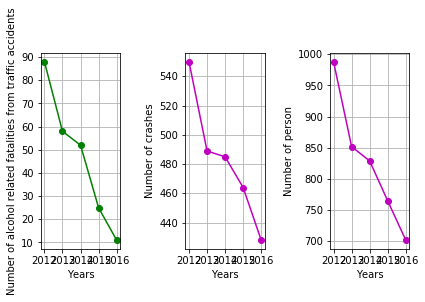

In [285]:
"""
    Crashes_Last_Five_Years.csv 
"""

# General variables 

years = np.arange(2012,2018,1) #from 2012-2017
year_str=','.join(str(i) for i in years)
list_years = []
year_str_arr=np.array([str(x) for x in year_str.split(',')])

# Import and generate basic dataframe

raw_data = pd.read_csv('Crashes_Last_Five_Years.csv')
raw_df = pd.DataFrame(raw_data)
Crashes_5years = pd.DataFrame()
# Import data into Crashes_5 years
Crashes_5years = raw_df.filter(['ACCIDENT_DATE','DAY_OF_WEEK','ACCIDENT_TIME','ALCOHOL_RELATED','ALCOHOLTIME','INJ_OR_FATAL','FATALITY','TOTAL_PERSONS'], axis=1)
Crashes_5years['INJURY'] = Crashes_5years['INJ_OR_FATAL'] - Crashes_5years['FATALITY']

# Preprocess date_time. - replace . with : and merge 'ACCIDENT_DATE' and 'ACCIDENT_TIME'
Crashes_5years['ACCIDENT_TIME'] = [x.replace('.',":") for x in Crashes_5years['ACCIDENT_TIME']]
Crashes_5years['ACCIDENT_TIME'] = Crashes_5years['ACCIDENT_DATE'].map(str) +" "+ Crashes_5years['ACCIDENT_TIME']
del(Crashes_5years['ACCIDENT_DATE'])
Crashes_5years['ACCIDENT_TIME'] = pd.to_datetime(Crashes_5years['ACCIDENT_TIME'])

# Get only alcohol related data:
filter_data = Crashes_5years[Crashes_5years['ALCOHOL_RELATED'] == 'Yes']

# Seperate pre-processed dataframe into small dataframes for each year from 2012 to 2016
for i in range(0,len(year_str_arr)):
    if i==5:
        break
    list_years.append(filter_data[(filter_data['ACCIDENT_TIME'] >= year_str_arr[i]+'-01-01') & 
                                  (filter_data['ACCIDENT_TIME'] <= year_str_arr[i+1]+'-01-01')].sort_values('ACCIDENT_TIME'))
    
year_str_arr = year_str_arr[:-1] # To make it between 2012-2016
total_year = len(year_str_arr)
# Plot dataframe
Crashes_5years_plot = pd.DataFrame()
Crashes_5years_plot['Year'] = year_str_arr
Crashes_5years_plot['ALCOHOL_FATALITY'] = [list_years[i]['FATALITY'].sum() for i in range(0,total_year)]
Crashes_5years_plot['Number_of_crashes']=[len(list_years[i]) for i in range(0,total_year)]
Crashes_5years_plot['TOTAL_PERSONS'] = [list_years[i]['TOTAL_PERSONS'].sum() for i in range(0,total_year)]
# Line graph of "Number of crashes"
plt.subplot(1,3,1)
plt.plot(Crashes_5years_plot['Year'],Crashes_5years_plot['ALCOHOL_FATALITY'],'go-')
plt.grid(True)
plt.ylabel("Number of alcohol related fatalities from traffic accidents")
plt.xlabel("Years")
# Line graph of "Number of alcohol related fatalities from traffic accident"
plt.subplot(1,3,2)
plt.plot(Crashes_5years_plot['Year'],Crashes_5years_plot['Number_of_crashes'],'mo-')
plt.grid(True)
plt.ylabel("Number of crashes")
plt.xlabel("Years")
# Total persons
plt.subplot(1,3,3)
plt.plot(Crashes_5years_plot['Year'],Crashes_5years_plot['TOTAL_PERSONS'],'mo-')
plt.grid(True)
plt.ylabel("Number of person")
plt.xlabel("Years")
# Display the graphs
plt.tight_layout()
plt.show()





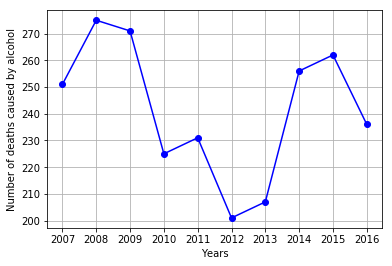

In [289]:
"""
    Underlying_causes_of_death.xls
"""
alcohol_death_df = pd.read_excel('Underlying_causes_of_death.xls')
alcohol_death_df.reset_index(level=0, inplace=True)

# Functions

def get_name(key):
    if str(key).isdigit()==True:
        return "Males"
    else:
        filter_key = key.split(" ")
        if (len(filter_key) == 2):
            if(int(filter_key[1])%2 == 1):
                return "Females"
            else:
                return "Total"
        else:
                return "Causes"
def remove_missing_data(dataset):
    for i in df_cols[1:]:
        if(dataset[i].isnull().values.any()):
            del(dataset[i])
    return dataset

# Pre-process stage: Filter all the case related to alcohol.
alcohol_death = alcohol_death_df[alcohol_death_df['index'].str.contains('alcohol|Alcoholic')==True].iloc[2:]
df_cols = list(alcohol_death) # contains the column of each dataframe.
alcohol_death = remove_missing_data(alcohol_death)
for i in df_cols:
    alcohol_death = alcohol_death.rename(columns={i:get_name(i)})
    
# Seperate pre-processed dataframe into small dataframes for each year. 2012-2016

year_list = []
tot_cols = len(list(alcohol_death))
for i in np.arange(1,tot_cols,3):
    year_list.append(alcohol_death.iloc[:,i:i+3])
for i in range(0,len(year_list)):
    year_list[i]=year_list[i][year_list[i]['Total'] != 0] # Remove 0 values
"""
     year_list[0] : data for 2007
     year_list[1] : data for 2008
     year_list[2] : data for 2009
     year_list[3] : data for 2010
     year_list[4] : data for 2011
     year_list[5] : data for 2012
     year_list[6] : data for 2013
     year_list[7] : data for 2014
     year_list[8] : data for 2015
     year_list[9] : data for 2016
"""   

# Recalculate inaccurate Total values
for i in year_list:
    i['Total']=i['Males']+i['Females']
    
# Number of death by alcohol:
total_alcohol_disease=[]
for i in year_list:
    total_alcohol_disease.append(i['Total'].sum())
total_alcohol_disease = total_alcohol_disease[-5:] #from 2012-2016

# Plot graph
alcohol_disease = pd.DataFrame()
alcohol_disease['Year'] = year_str_arr
alcohol_disease['Deaths'] = [i for i in total_alcohol_disease] 
plt.plot(alcohol_disease['Year'],alcohol_disease['Deaths'],'bo-')
plt.grid(True)
plt.ylabel("Number of deaths caused by alcohol")
plt.xlabel("Years")
plt.show()




,Males,Females,Total
483,51,11,62
908,125,36,161
1785,18,6,24
1807,0,2,2
1859,0,2,2


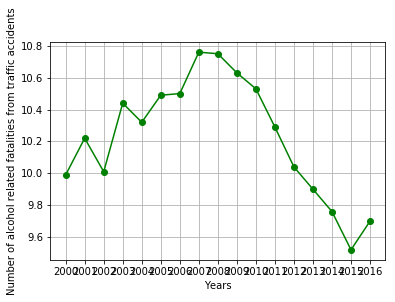

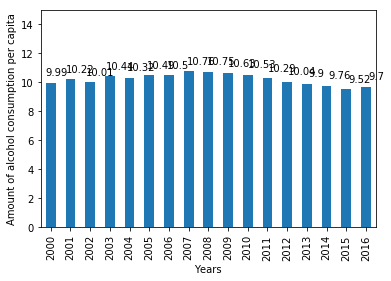

In [295]:
"""
    total_alcohol_consumption.csv
"""
years = np.arange(2000,2017,1) #from 2012-2017
year_str=','.join(str(i) for i in years)
year_str_arr=np.array([str(x) for x in year_str.split(',')])

# Functions
def fix_space_column_name(col_name):
    return col_name.replace(" ","_")
    
# Pre-process stage:    
raw_consumption = pd.read_csv('total_alcohol_consumption.csv')
consumption = pd.DataFrame()
consumption = raw_consumption.filter(['Measure','Beverage Type','Time','Value'], axis=1)
col_list = list(consumption)
# Remove space in column names
for i in col_list:
    consumption = consumption.rename(columns={i:fix_space_column_name(i)})
# Filter data.
per_capita = consumption[consumption.Measure.str.contains('Per')==True]
per_capita = per_capita[per_capita['Beverage_Type']=="Total all beverages"]
per_capita = per_capita[per_capita['Time']>=2000]
per_capita['Time']=year_str_arr
# Line graph of "Total alcohol consumption"
plt.plot(per_capita['Time'],per_capita['Value'],'go-')
plt.grid(True)
plt.ylabel("Number of alcohol related fatalities from traffic accidents")
plt.xlabel("Years")
# Bar chart of "Number of alcohol related fatalities from traffic accident"
per_capita_bar = pd.DataFrame() # Store the drawing data.
per_capita_bar['Year']=year_str_arr
per_capita_bar['Value']=list(per_capita['Value'])
per_capita_bar=per_capita_bar.set_index('Year')
alcohol_bar = per_capita_bar.plot(kind='bar',legend=False)
alcohol_bar.set_ylim(0,15)
alcohol_bar.set_xlabel("Years")
alcohol_bar.set_ylabel("Amount of alcohol consumption per capita")
for p in alcohol_bar.patches:
    alcohol_bar.annotate(str(p.get_height()), (p.get_x() * 1.025, p.get_height() + 0.5))

# Display the graphs
plt.show()

In [296]:
per_capita=per_capita.set_index('Time')
del(per_capita['Measure'])

In [297]:
del(per_capita['Beverage_Type'])

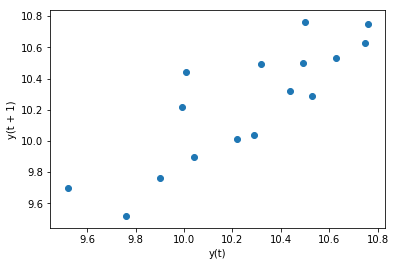

In [298]:
lag_plot(per_capita)

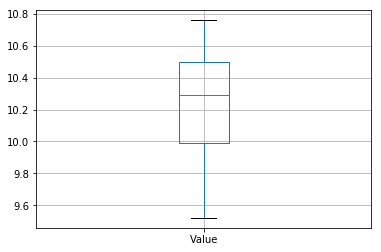

In [299]:
per_capita.boxplot()

In [301]:
"""
    Linear Correlation using Pearson method between ?? Crashes 5 years + alcohol consumption
"""
x = per_capita_bar['Value']
y = Crashes_5years_plot['ALCOHOL_FATALITY']
n = len(per_capita_bar)

x_m = x.mean()
y_m = y.mean()

numerator = 0
denominator = 0
for i in range(0,n):
    numerator += (x[i]-x_m)*(y[i]-y_m)
    denominator += mth.sqrt((x[i]-x_m)**2)*mth.sqrt((y[i]-y_m)**2)

rxy = numerator/denominator

rxy

IndexError: index out of bounds

In [302]:
n_alcon_crashes = pd.DataFrame()
n_alcon_crashes['Litres_per_capita'] = per_capita_bar['Value'] >= 
n_alcon_crashes['Number_of_deaths'] = [i for i in Crashes_5years_plot['ALCOHOL_FATALITY']]
# h_map_1 = n_alcon_crashes.values
# min_max_scaler = preprocessing.MinMaxScaler()
# h_map_1_scaled = min_max_scaler.fit_transform(h_map_1)
# n_alcon_crashes = pandas.DataFrame(h1_maap_1_scaled)
# Code adapted from {https://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame}, author: Sand man


SyntaxError: invalid syntax (<ipython-input-302-3d995a4f4692>, line 2)

In [303]:
# Crashes_5years_plot['ALCOHOL_FATALITY'].plot.box(grid=True)
# Crashes_5years_plot['Number_of_crashes'].plot.box(grid=True)
# Crashes_5years_plot['TOTAL_PERSONS'].plot.box(grid=True)
Crashes_5years_plot['ALCOHOL_FATALITY']

Year
2012    88
2013    58
2014    52
2015    25
2016    11
Name: ALCOHOL_FATALITY, dtype: int64

In [304]:
per_capita_bar['Value']

Year
2000     9.99
2001    10.22
2002    10.01
2003    10.44
2004    10.32
2005    10.49
2006    10.50
2007    10.76
2008    10.75
2009    10.63
2010    10.53
2011    10.29
2012    10.04
2013     9.90
2014     9.76
2015     9.52
2016     9.70
Name: Value, dtype: float64

In [305]:
per_capita_07_16 = [10.76,10.75,10.63,10.53,10.29,10.04,9.9,9.76,9.52,9.7]
per_capita_07_16.sort()
len(per_capita_07_16)

10

In [306]:
per_capita_07_16


[9.52, 9.7, 9.76, 9.9, 10.04, 10.29, 10.53, 10.63, 10.75, 10.76]

In [307]:
per_capita_bar

,Value
Year,
2000,9.99
2001,10.22
2002,10.01
2003,10.44
2004,10.32
2005,10.49
2006,10.50
2007,10.76
2008,10.75


In [308]:
alcohol_death

,Causes,Males,Females,Males,Females,Males,Females,Males,Females,Males,...,Males,Females,Males,Females,Males,Females,Males,Females,Males,Females
483,Mental and behavioural disorders due to use of alcohol (F10),51,11,64,19,46,20,47,13,44,...,30,11,36,14,34,14,41,15,38,11
908,Alcoholic liver disease (K70),125,36,131,46,137,37,108,31,102,...,112,34,111,37,143,42,135,50,108,49
1785,Accidental poisoning by and exposure to alcohol (X45),18,6,9,1,16,6,17,9,15,...,7,1,5,4,12,7,15,3,22,6
1807,Intentional self-poisoning by and exposure to alcohol (X65),0,2,1,0,2,4,0,0,0,...,0,0,0,0,2,0,3,0,1,0
1859,"Poisoning by and exposure to alcohol, undetermined intent (Y15)",0,2,4,0,3,0,0,0,0,...,2,4,0,0,2,0,0,0,0,1
1938,Evidence of alcohol involvement determined by blood alcohol level (Y90),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1939,Evidence of alcohol involvement determined by level of intoxication (Y91),0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [309]:
new_year = ['2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
alcohol_d = [251,275,271,225,231,201,207,256,262,236]
al_comp_cap = [10.76,10.75,10.63,10.53,10.29,10.04,9.9,9.76,9.52,9.7]
bins = 3

###
min_x = min(al_comp_cap)
max_x = max(al_comp_cap)
x_range = max_x - min_x
x_step = x_range/bins
range_1 = min_x + x_step
range_2 = range_1 + x_step
range_3 = range_2 + x_step
###
min_y = min(alcohol_d)
max_y = max(alcohol_d)
y_range = max_y - min_y
y_step = y_range/bins
yrange_1 = min_y + y_step
yrange_2 = yrange_1 + y_step
yrange_3 = yrange_2 + y_step
def class_me2(i):
    if min_y <= i <= yrange_1:
        return "1"
    elif yrange_1 <= i <= yrange_2:
        return "2"
    elif yrange_2 <= i <= yrange_3:
        return "3"
def class_me(i):
    if min_x <= i <= range_1:
        return "a"
    elif range_1 <= i <= range_2:
        return "b"
    elif range_2 <= i <= range_3:
        return "c"
    

In [310]:
"""
    Mutual Information
"""
Mi_df = pd.DataFrame()
Mi_df['Year'] = new_year
Mi_df['Litres_person'] = al_comp_cap
Mi_df['Class'] = [class_me(i) for i in Mi_df['Litres_person']]
Mi_df['Number_of_deaths'] = alcohol_d
Mi_df['Class2'] = [class_me2(i) for i in Mi_df['Number_of_deaths']]


H_class_class2 =0.458-((4/10)*((1/4)*mth.log((1/4),2)-(3/4)*mth.log((3/4),2))+(2/10)*((1/2)*mth.log((1/2),2)-(1/2)*mth.log((1/2),2))+(4/10)*((1/4)*mth.log((1/4),2)-(1/4)*mth.log((1/4),2)-(2/4)*mth.log((2/4),2)))
H_class_class2

sklearning.prepro

NameError: name 'sklearning' is not defined

In [311]:
sm.normalized_mutual_info_score(Mi_df['Class'],Mi_df['Class2'])



0.2400679387241217

In [312]:
Mi_df

,Year,Litres_person,Class,Number_of_deaths,Class2
0,2007,10.76,c,251,3
1,2008,10.75,c,275,3
2,2009,10.63,c,271,3
3,2010,10.53,c,225,1
4,2011,10.29,b,231,2
5,2012,10.04,b,201,1
6,2013,9.90,a,207,1
7,2014,9.76,a,256,3
8,2015,9.52,a,262,3
9,2016,9.70,a,236,2


In [313]:
def normalize_df(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)

In [314]:
n_mi_df = pd.DataFrame()
n_mi_df['Litres_person'] = Mi_df['Litres_person']
n_mi_df['Number_of_deaths'] = Mi_df['Number_of_deaths']


In [315]:
n_mi_df = normalize_df(n_mi_df)

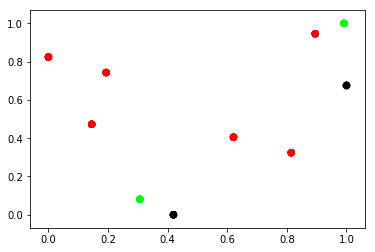

In [316]:

# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
for i in year_list:
    plt.scatter(n_mi_df[0],n_mi_df[1],c=colormap[model.labels_],s=40)

In [317]:
def range_of_bin(n,df):
    # ONLY USE FOR NORMALIZED DATAFRAME
    type_bin = []
    max_t = max(df)
    min_t = min(df)
    step_t = (max_t-min_t)/n
    range_t = []
    t_range = min_t
    for x in range(0,n):
        t_range+=step_t
        range_t.append(t_range)
    return range_t
def classify_this(n,x1,x2,x3,x4):
    if n <= x1:
        return 1
    elif x1<=n<=x2:
        return 2
    elif x2<=n<=x3:
        return 3
    elif x3<=n<=x4:
        return 4
            
 
                
        

In [318]:
nggg=[]
t_range = 2
for x in range(0,3):
    t_range +=3
    nggg.append(t_range)
nggg

[5, 8, 11]

In [319]:

def class_me2(i):
    if min_y <= i <= yrange_1:
        return "1"
    elif yrange_1 <= i <= yrange_2:
        return "2"
    elif yrange_2 <= i <= yrange_3:
        return "3"
def class_me(i):
    if min_x <= i <= range_1:
        return "a"
    elif range_1 <= i <= range_2:
        return "b"
    elif range_2 <= i <= range_3:
        return "c"

In [333]:
n_mi_df

,0,1,Bin0,Bin1
0,1.000000,0.675676,2,2
1,0.991935,1.000000,2,2
2,0.895161,0.945946,2,2
3,0.814516,0.324324,2,1
4,0.620968,0.405405,2,1
5,0.419355,0.000000,1,1
6,0.306452,0.081081,1,1
7,0.193548,0.743243,1,2
8,0.000000,0.824324,1,2
9,0.145161,0.472973,1,1


In [321]:
range_of_bin(2,n_mi_df[1])

[0.5, 1.0]

In [322]:
max(n_mi_df[0])-min(n_mi_df)

1.0

In [323]:
n_mi_df["Bin0"] = [classify_this(i,0.5,1.0,0,0) for i in n_mi_df[0]]
n_mi_df["Bin1"] = [classify_this(i,0.5,1.0,0,0) for i in n_mi_df[1]]



In [324]:
sm.normalized_mutual_info_score(n_mi_df['Bin0'],n_mi_df['Bin1'])

0.029049405545331995

In [325]:
n_mi_df

,0,1,Bin0,Bin1
0,1.000000,0.675676,2,2
1,0.991935,1.000000,2,2
2,0.895161,0.945946,2,2
3,0.814516,0.324324,2,1
4,0.620968,0.405405,2,1
5,0.419355,0.000000,1,1
6,0.306452,0.081081,1,1
7,0.193548,0.743243,1,2
8,0.000000,0.824324,1,2
9,0.145161,0.472973,1,1


In [326]:
np.corrcoef(alcohol_d, al_comp_cap)[0,1]

0.2726950371325311

In [327]:
def normalize_df(df):
    x = df.values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    return pd.DataFrame(x_scaled)

In [328]:
compr_df = pd.DataFrame()
compr_df['alcohol_d'] = alcohol_d
compr_df['al_comp_cap'] = al_comp_cap

In [329]:
compr_df = normalize_df(compr_df)
compr_df = compr_df.rename(columns={0:"alcohol_d",1:"al_comp_cap"})



In [330]:
compr_df

,alcohol_d,al_comp_cap
0,0.675676,1.000000
1,1.000000,0.991935
2,0.945946,0.895161
3,0.324324,0.814516
4,0.405405,0.620968
5,0.000000,0.419355
6,0.081081,0.306452
7,0.743243,0.193548
8,0.824324,0.000000
9,0.472973,0.145161


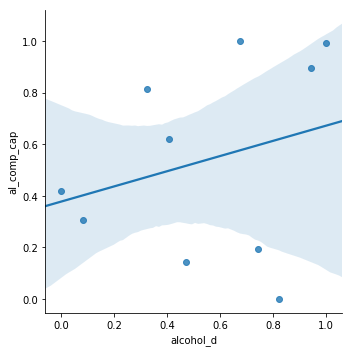

In [331]:
sns.lmplot(x="alcohol_d",y="al_comp_cap",data=compr_df,fit_reg=True) 



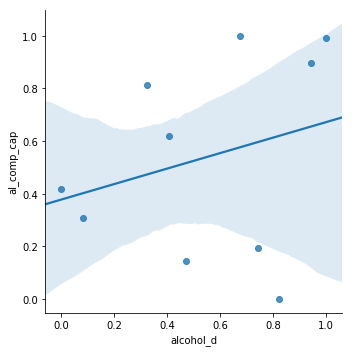

In [332]:
sns.lmplot(x="alcohol_d",y="al_comp_cap",data=compr_df) 

